Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

For data example used subest of columbs: LotArea, YearBuilt, YrSold, SalePrice
All data are interpreted as continuos variables



In [1]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt

1460


Text(0, 0.5, 'Price')

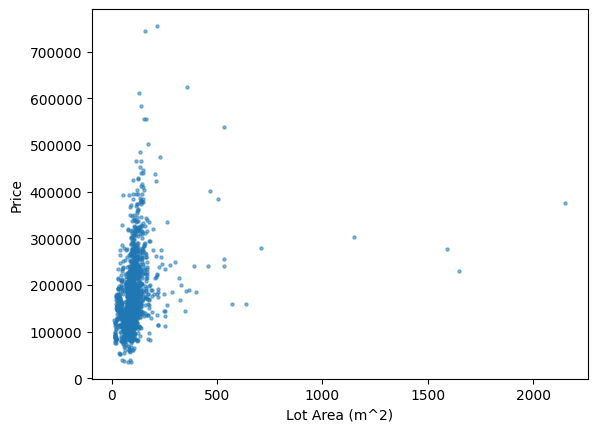

In [2]:
# reading given data and visualizing it
tsvFile = "../data/continuosDataExample.tsv"
myData = np.genfromtxt(tsvFile, delimiter="\t", skip_header=1)
rows, params = myData.shape
print(rows)
# data as squared meters
plt.scatter(myData[:,0]/100,myData[:,3], alpha=0.5, s = 5)
plt.xlabel('Lot Area (m^2)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

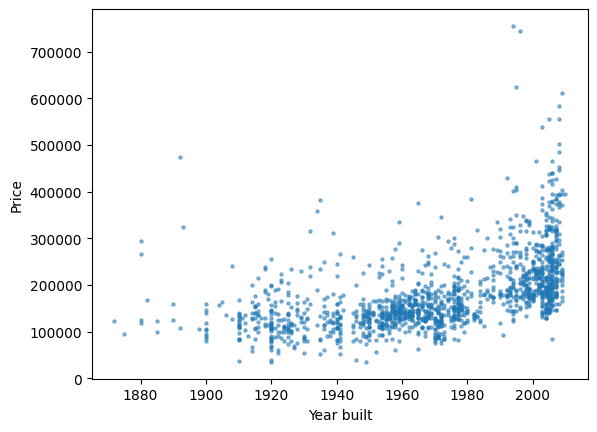

In [3]:
plt.scatter(myData[:,1],myData[:,3], alpha=0.5, s = 5)
plt.xlabel('Year built')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

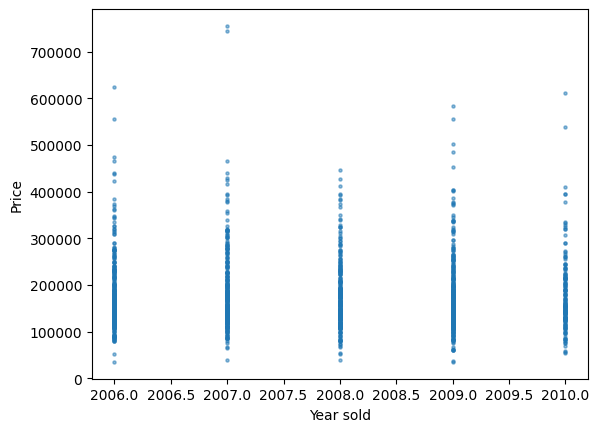

In [4]:
plt.scatter(myData[:,2],myData[:,3], alpha=0.5, s = 5)
plt.xlabel('Year sold')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

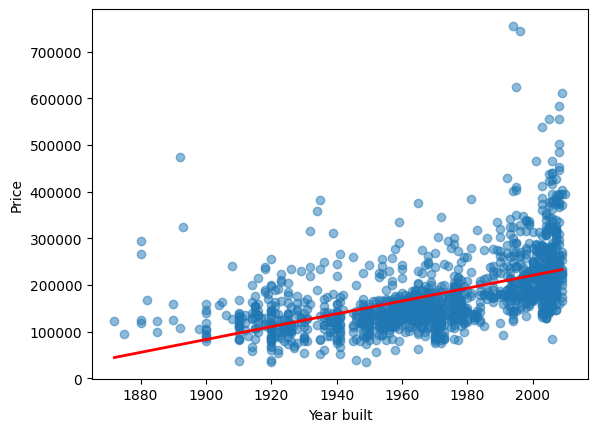

In [5]:
n = 2 # total base functions / polynomial degree - 1

# selecting data for analysis
x = myData[:,1]
y = myData[:,3]

# obtaining polynomial coeficients
G = np.zeros((rows, n))
for i in range(0,n):
  G[:,i] = x**i
c = np.linalg.solve(np.matmul(G.transpose(),G), np.matmul(G.transpose(),y))


# define function to obtain regression values
def getApproxValue(x, c):
  y = np.zeros(len(x))
  for i in range(0,len(c)):
    y = y + c[i] * x**i
  return y

# visuzalizing regression results
xx = np.arange(min(x), max(x), 1)
yy = getApproxValue(xx, c)

plt.scatter(x,y, alpha=0.5)
plt.plot(xx, yy, 'r', linewidth=2)
plt.xlabel('Year built')
plt.ylabel('Price')


**To do:**

1. Try different polynomial functions to analyze the results
2. Search and select built in python functions and compare results (built in functions with manually obtained values)

[0, 3153394292.6746507]
[1, 2291188114.3629584]
[2, 2054678942.8907065]
[3, 2050243158.4537187]
[4, 2053673780.5040233]
[5, 2049772640.6261365]
[6, 2049764058.5315673]


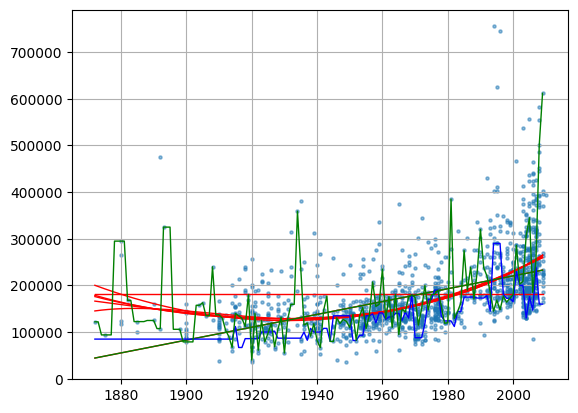

In [6]:
m = 7

x = myData[:,1]
y = myData[:,3]

def get_coefficients(x_, y_, m):
    G = np.zeros((len(x_), m))
    for i in range(0,m):
        G[:,i] = x_**i
    c_ = np.linalg.solve(np.matmul(G.transpose(),G), np.matmul(G.transpose(),y_))
    return(c_)

def get_polynomial(a_):
    pol_fun = lambda x : sum([pow(x, i) * a_[i] for i in range(len(a_))])
    return(pol_fun)

def get_error(pol_fun, x_, y_):
    n = len(x_)
    err = sum([pow(pol_fun(x_[i]) - y_[i], 2) for i in range(n)]) / (2*n)
    return(err)

fig = plt.figure()
ax = fig.gca()
ax.scatter(x, y, alpha=0.5, s = 5)
for i in range(m):
    pol_fun = get_polynomial(get_coefficients(x, y, i + 1))
    print([i, get_error(pol_fun, x, y)])
    xx = np.arange(min(x), max(x), 1)
    yy = [pol_fun(j) for j in xx]
    ax.plot(xx, yy, 'r', linewidth=1)

from sklearn.linear_model import LinearRegression
X = [[i] for i in x]
reg = LinearRegression().fit(X, y)
xx = np.arange(min(x), max(x), 1)
X = [[i] for i in xx]
yy = reg.predict(X)
ax.plot(xx, yy, 'g', linewidth=1)

from sklearn.neighbors import KNeighborsClassifier
X = [[i] for i in x]
reg = KNeighborsClassifier(n_neighbors=50).fit(X, y)
xx = np.arange(min(x), max(x), 1)
X = [[i] for i in xx]
yy = reg.predict(X)
ax.plot(xx, yy, 'b', linewidth=1)

from sklearn.neighbors import KNeighborsClassifier
X = [[i] for i in x]
reg = KNeighborsClassifier(n_neighbors=1).fit(X, y)
xx = np.arange(min(x), max(x), 1)
X = [[i] for i in xx]
yy = reg.predict(X)
ax.plot(xx, yy, 'g', linewidth=1)

ax.grid()
